# MNIST Digit Recognition

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Display the number of samples and dimensions of the images
print(f"Number of training samples: {len(train_images)}")
print(f"Image dimensions: {train_images.shape[1:]}")

Number of training samples: 60000
Image dimensions: (28, 28)


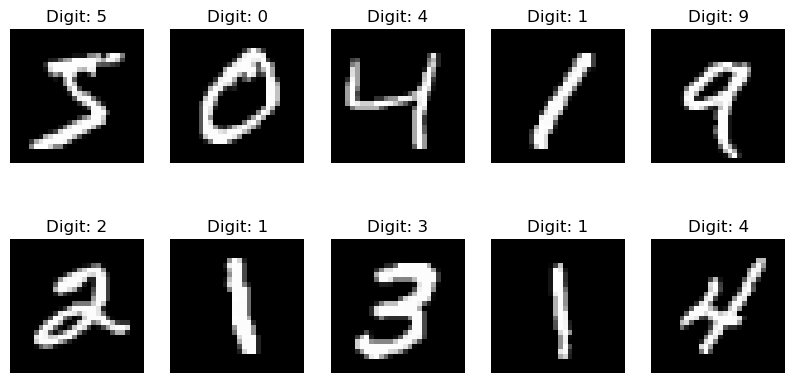

In [4]:
# Display the first 10 digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Digit: {train_labels[i]}')
    plt.axis('off')

plt.show()

Label: 6


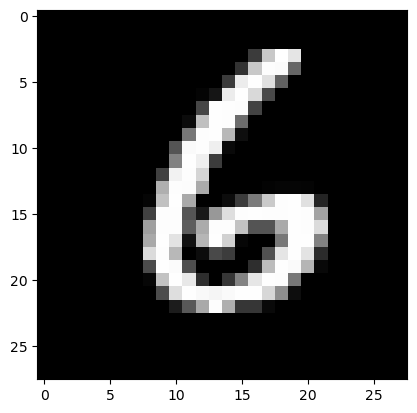

In [5]:
print("Label: {}".format(train_labels[6000]))
plt.imshow(train_images[6000], cmap='gray')

Label: 8


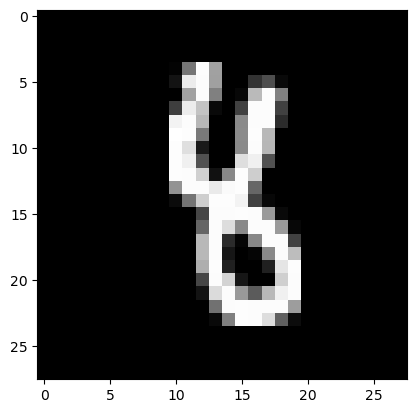

In [6]:
print("Label: {}".format(train_labels[7000]))
plt.imshow(train_images[7000], cmap='gray')

Label: 7


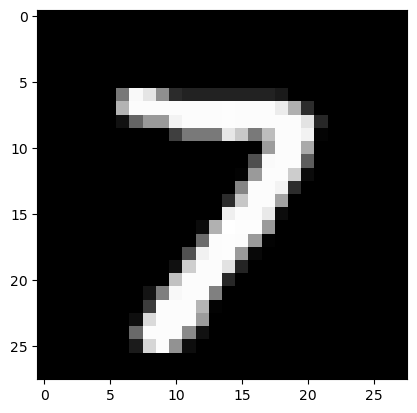

In [7]:
print("Label: {}".format(train_labels[4000]))
plt.imshow(train_images[4000], cmap='gray')

In [8]:
# Preprocess the MNIST dataset
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [9]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [10]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

In [11]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6520 - accuracy: 0.8348 - val_loss: 0.3547 - val_accuracy: 0.9033
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3346 - accuracy: 0.9068 - val_loss: 0.2903 - val_accuracy: 0.9217
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2865 - accuracy: 0.9190 - val_loss: 0.2618 - val_accuracy: 0.9252
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2567 - accuracy: 0.9273 - val_loss: 0.2370 - val_accuracy: 0.9340
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2340 - accuracy: 0.9338 - val_loss: 0.2165 - val_accuracy: 0.9385
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2157 - accuracy: 0.9394 - val_loss: 0.2008 - val_accuracy: 0.9431
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2004 - accuracy: 0.9439 - val_loss: 0.1886 - val_accurac

In [12]:
# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(train_images, train_labels)
print(f'Training accuracy: {train_acc * 100:.2f}%')

1875/1875 [==============================] - 2s 934us/step - loss: 0.1585 - accuracy: 0.9557
Training accuracy: 95.57%


In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 0s 926us/step - loss: 0.1601 - accuracy: 0.9536
Test accuracy: 95.36%
